In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

In [4]:
# Read the data
gold_df = pd.read_csv('../data/gld_price_data.csv')
gold_df


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
numerical_cols = gold_df.select_dtypes(include=[float, int])
numerical_cols

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


<AxesSubplot: >

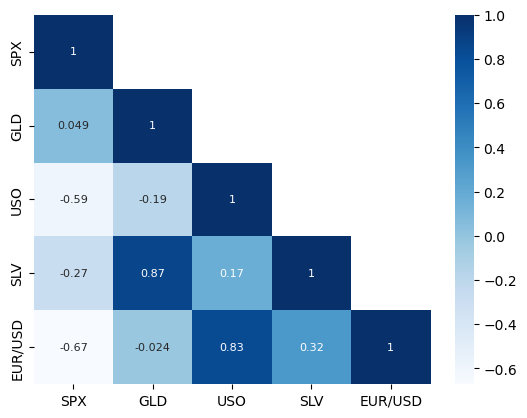

In [36]:
corr = numerical_cols.corr()
mask = ~np.tri(numerical_cols.shape[1], dtype=bool)
sns.heatmap(corr, annot=True, annot_kws={'size': 8},mask=mask, cmap='Blues')

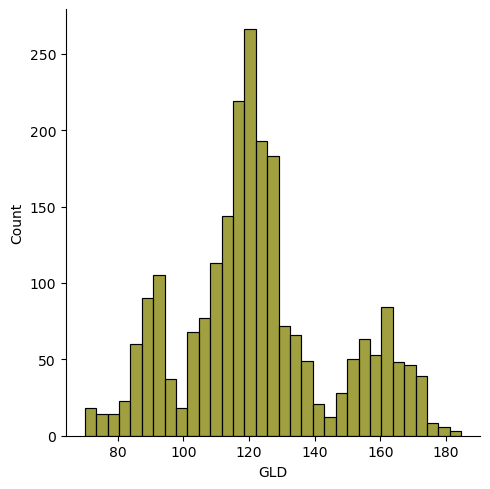

In [ ]:
sns.displot(gold_df['GLD'], color='olive');

<AxesSubplot: >

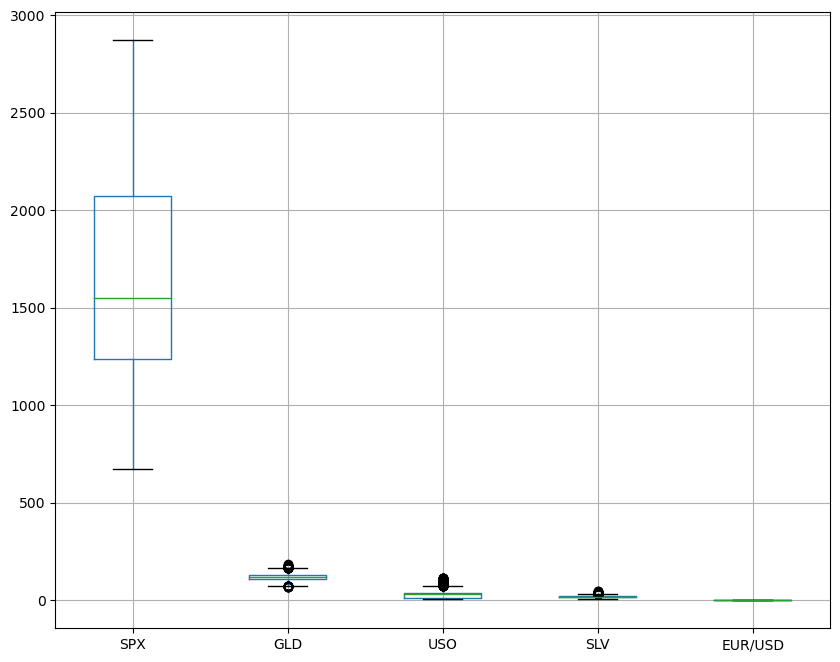

In [40]:
gold_df.boxplot(figsize=(10,8))

In [43]:
X = gold_df.drop(columns=['Date', 'GLD'], axis=1)
y = gold_df['GLD']

In [46]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [45]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
reg = RandomForestRegressor(n_estimators=100)

In [49]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
X_test_pred = reg.predict(X_test)
X_test_pred

array([122.49039967, 130.35040342, 127.57689979,  96.54449708,
       118.92180094, 114.24639913, 124.7060017 , 117.76259946,
       107.99490115,  98.5772995 ,  95.62629912, 167.67819816,
       149.11810105, 116.10800064, 170.81650168,  84.87649927,
       123.13079889, 109.34489724, 113.13270057, 131.64590338,
       124.24029887, 113.64470062, 115.88150103, 108.83319999,
       108.41430138, 125.77429889, 119.64519991, 111.85649933,
       113.67460166, 125.27689894, 145.7328014 ,  89.48339999,
       167.78069961, 113.58429941, 108.34390082, 120.17710111,
       142.22609922, 161.46870137, 174.16319791, 153.35080146,
       119.44700116, 113.57420051, 121.36989954, 113.59429928,
       122.12100016, 108.07390084,  88.52039904, 114.42479895,
       129.80700252, 118.17600098, 103.52529989, 129.72810261,
       107.05519877, 160.69230414, 131.75250017, 118.5559    ,
       147.22840067, 135.36050175,  95.56290089, 124.59700156,
       115.24489884,  85.98990115, 104.25769914, 114.03

In [55]:
X_test_accuracy = r2_score(X_test_pred, y_test)
X_test_accuracy

0.9906295018788773

In [57]:
y_test = list(y_test)

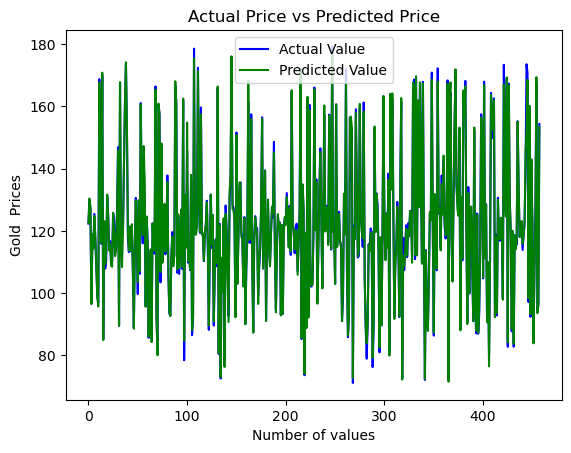

In [60]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(X_test_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold  Prices')
plt.legend();